In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pre_data = pd.read_csv("C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Data\\PreProcessingGreece.csv")
Pre_data

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
0,7970,2016-10-10,Greece,37.975359,23.711933,2.0,1.0,1.0,1.0,30.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,10
1,7971,2016-03-04,Greece,37.967282,23.710791,4.0,2.0,2.0,3.0,100.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,3
2,7972,2013-06-29,Greece,37.970897,23.707158,4.0,1.0,2.0,3.0,40.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,6
3,7973,2012-09-21,Greece,37.968037,23.709505,2.0,1.0,1.0,1.0,69.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,9
4,7974,2016-06-24,Greece,38.007397,23.733237,2.0,1.0,1.0,1.0,50.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920,494422,2015-03-24,Greece,37.957389,23.718684,4.0,1.0,1.0,2.0,48.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,3
3921,494423,2015-04-15,Greece,37.966042,23.733293,4.0,1.0,2.0,1.0,50.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,4
3922,494424,2016-11-19,Greece,37.966159,23.729267,5.0,1.0,1.0,3.0,55.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,11
3923,494425,2016-05-26,Greece,37.957656,23.719785,3.0,1.0,1.0,1.0,24.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,5


<AxesSubplot:ylabel='Frequency'>

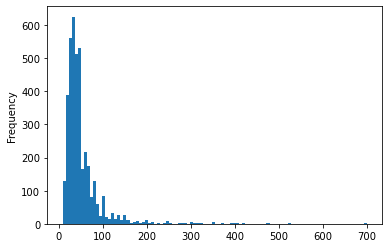

In [2]:
Pre_data['Price'].plot(kind='hist', bins=100)

In [3]:
Pre_data['group'] = pd.cut(x=Pre_data['Price'],
bins=[0, 50, 100, 150, 200, 1000],
labels=['group_1','group_2','group_3','group_4','group_5'])
Pre_data.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month,group
0,7970,2016-10-10,Greece,37.975359,23.711933,2.0,1.0,1.0,1.0,30.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,10,group_1
1,7971,2016-03-04,Greece,37.967282,23.710791,4.0,2.0,2.0,3.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,3,group_2
2,7972,2013-06-29,Greece,37.970897,23.707158,4.0,1.0,2.0,3.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,6,group_1
3,7973,2012-09-21,Greece,37.968037,23.709505,2.0,1.0,1.0,1.0,69.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,9,group_2
4,7974,2016-06-24,Greece,38.007397,23.733237,2.0,1.0,1.0,1.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,6,group_1


In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Pre_data, Pre_data["group"]):
    train = Pre_data.loc[train_index]
    test = Pre_data.loc[test_index]

In [5]:
train['group'].value_counts() / len(train)

group_1    0.699682
group_2    0.233439
group_3    0.042357
group_5    0.013694
group_4    0.010828
Name: group, dtype: float64

In [6]:
test['group'].value_counts() / len(test)

group_1    0.699363
group_2    0.233121
group_3    0.043312
group_5    0.014013
group_4    0.010191
Name: group, dtype: float64

In [7]:
train.drop('group', axis=1, inplace=True)
train.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
311,20865,2013-09-15,Greece,38.001159,23.731074,2.0,1.5,1.0,2.0,16.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6,9
937,123710,2015-03-29,Greece,37.973538,23.735030,4.0,1.0,1.0,2.0,58.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6,3
134,10464,2016-04-11,Greece,37.978558,23.755261,2.0,1.5,1.0,1.0,32.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,4
41,8202,2014-06-30,Greece,37.967666,23.724920,3.0,1.0,1.0,2.0,50.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,6
2913,376320,2016-06-08,Greece,37.966239,23.737595,4.0,2.0,2.0,2.0,190.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,6


In [8]:
test.drop(['Unnamed: 0','group', 'Host Since', 'Country', 'Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
test.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
2582,37.966612,23.748269,6.0,1.0,2.0,3.0,26.0,2.0,24.0,1.0,1125.0,30.0,1.0,0.0,0.0,2,7
2287,37.971120,23.743266,5.0,2.0,2.0,3.0,65.0,1.0,0.0,3.0,20.0,1.0,1.0,0.0,0.0,4,2
22,37.973238,23.728989,4.0,1.0,1.0,2.0,100.0,1.0,0.0,1.0,1125.0,8.0,1.0,0.0,0.0,0,10
2641,37.968785,23.750648,8.0,2.0,3.0,5.0,178.0,3.0,23.0,3.0,21.0,3.0,1.0,0.0,0.0,0,7
1489,37.963956,23.722323,4.0,1.0,1.0,2.0,42.0,2.0,5.0,1.0,30.0,18.0,1.0,0.0,0.0,3,3


In [9]:
train_y = train[['Price']]
train_y.head()

,Price
311,16.0
937,58.0
134,32.0
41,50.0
2913,190.0


In [10]:
train.drop(['Unnamed: 0', 'Price', 'Host Since', 'Country','Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
train_X = train
train_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
311,38.001159,23.731074,2.0,1.5,1.0,2.0,1.0,10.0,1.0,30.0,2.0,0.0,1.0,0.0,6,9
937,37.973538,23.735030,4.0,1.0,1.0,2.0,1.0,0.0,2.0,1125.0,60.0,1.0,0.0,0.0,6,3
134,37.978558,23.755261,2.0,1.5,1.0,1.0,2.0,8.0,1.0,1125.0,40.0,0.0,1.0,0.0,0,4
41,37.967666,23.724920,3.0,1.0,1.0,2.0,1.0,18.0,2.0,90.0,1.0,1.0,0.0,0.0,0,6
2913,37.966239,23.737595,4.0,2.0,2.0,2.0,2.0,30.0,1.0,1125.0,1.0,1.0,0.0,0.0,2,6


In [11]:
test_y= test[['Price']]
test_y.head()

,Price
2582,26.0
2287,65.0
22,100.0
2641,178.0
1489,42.0


In [12]:
test.drop('Price', axis=1, inplace=True)
test_X = test
test_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
2582,37.966612,23.748269,6.0,1.0,2.0,3.0,2.0,24.0,1.0,1125.0,30.0,1.0,0.0,0.0,2,7
2287,37.971120,23.743266,5.0,2.0,2.0,3.0,1.0,0.0,3.0,20.0,1.0,1.0,0.0,0.0,4,2
22,37.973238,23.728989,4.0,1.0,1.0,2.0,1.0,0.0,1.0,1125.0,8.0,1.0,0.0,0.0,0,10
2641,37.968785,23.750648,8.0,2.0,3.0,5.0,3.0,23.0,3.0,21.0,3.0,1.0,0.0,0.0,0,7
1489,37.963956,23.722323,4.0,1.0,1.0,2.0,2.0,5.0,1.0,30.0,18.0,1.0,0.0,0.0,3,3


In [13]:
# from sklearn.linear_model import LinearRegression

# l_reg = LinearRegression()
# l_reg.fit(train_X, train_y)

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

# predictions = l_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [15]:
# predictions = l_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [16]:
# from sklearn.tree import DecisionTreeRegressor

# d_reg = DecisionTreeRegressor()
# d_reg.fit(train_X, train_y)

In [17]:
# predictions = d_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [18]:
# predictions = d_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [19]:
# from sklearn.svm import SVR

# svr = SVR()
# svr.fit(train_X, train_y)

In [20]:
# predictions = svr.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [21]:
# predictions = svr.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [22]:
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor()
# knn.fit(train_X, train_y)

In [23]:
# predictions = knn.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [24]:
# predictions = knn.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [25]:
# from sklearn.neural_network import MLPRegressor

# ann = MLPRegressor()
# ann.fit(train_X, train_y)

In [26]:
# predictions = ann.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [27]:
# predictions = ann.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [28]:
from sklearn.ensemble import RandomForestRegressor

r_reg = RandomForestRegressor()
r_reg.fit(train_X, train_y)

C:\Users\2019A0~1\AppData\Local\Temp/ipykernel_12900/806139679.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(train_X, train_y)


RandomForestRegressor()

Text(0.5, 0, 'Relative Importance')

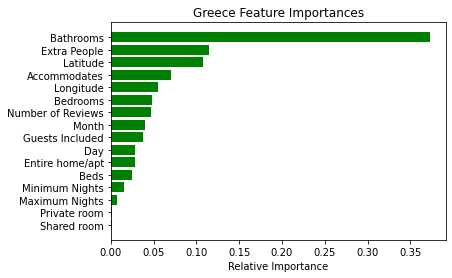

In [29]:
features = train_X.columns
importances = r_reg.feature_importances_
indices = np.argsort(importances)

plt.title('Greece Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [30]:
predictions = r_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

101.51504359872612 10.075467413411952 5.696219745222929


In [31]:
# from sklearn.model_selection import GridSearchCV

# param = {'n_estimators' : [800,900,1000], 'max_features' : ['sqrt','auto','log2'], 'max_depth' : [8,9,10],
#          'min_samples_split': [2,3,4]}

# r_reg = RandomForestRegressor(random_state=42)

# search = GridSearchCV(r_reg, param, cv=5,
#                       scoring='neg_mean_absolute_error')
                      
# search.fit(train_X, train_y['Price'].ravel())

In [32]:
# from sklearn.ensemble import RandomForestRegressor

# r_reg = RandomForestRegressor(bootstrap=True,
#                               min_samples_split=2,
#                               criterion='mse',
#                               max_depth=None,
#                               max_features='auto',
#                               n_estimators=1000,
#                               random_state=42,
#                               )
# r_reg.fit(train_X, train_y['Price'].ravel())

In [33]:
# predictions = r_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)